# Task: Given attributes about a person, predict whether their income is <=50k or >=50k

In [1072]:
#Import libraries
import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('pdf')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [1073]:
# Read csv file and convert "?" value to NAN
data = pd.read_csv('census_income_learn.csv', header = None, na_values = ' ?')
data.head(n = 10)
data.shape

(199523, 42)

In [1074]:
# Define the headers since the data does not have any
data.columns = ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC','AHGA','AHRSPAY','AHSCOL', 'AMARITL', 'AMJIND', 
                'AMJOCC', 'ARACE','AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN',
                'CAPLOSS', 'DIVVAL', 'FEDTAX', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL',
                'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 
                'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA', 'VETYN','WKSWORK', 'YEAR', 'EARN']


# Quick statistics

In [1075]:
# Include all to get description of different types of culumns 
print(data.describe(include = 'all'))

                 AAGE           ACLSWKR         ADTIND         ADTOCC  \
count   199523.000000            199523  199523.000000  199523.000000   
unique            NaN                 9            NaN            NaN   
top               NaN   Not in universe            NaN            NaN   
freq              NaN            100245            NaN            NaN   
mean        34.494199               NaN      15.352320      11.306556   
std         22.310895               NaN      18.067129      14.454204   
min          0.000000               NaN       0.000000       0.000000   
25%         15.000000               NaN       0.000000       0.000000   
50%         33.000000               NaN       0.000000       0.000000   
75%         50.000000               NaN      33.000000      26.000000   
max         90.000000               NaN      51.000000      46.000000   

                         AHGA        AHRSPAY            AHSCOL  \
count                  199523  199523.000000            1

In [1076]:
#Numerical columns
print(data.describe(include = [np.number]))

                AAGE         ADTIND         ADTOCC        AHRSPAY  \
count  199523.000000  199523.000000  199523.000000  199523.000000   
mean       34.494199      15.352320      11.306556      55.426908   
std        22.310895      18.067129      14.454204     274.896454   
min         0.000000       0.000000       0.000000       0.000000   
25%        15.000000       0.000000       0.000000       0.000000   
50%        33.000000       0.000000       0.000000       0.000000   
75%        50.000000      33.000000      26.000000       0.000000   
max        90.000000      51.000000      46.000000    9999.000000   

            CAPGAIN        CAPLOSS         DIVVAL         HHDREL  \
count  199523.00000  199523.000000  199523.000000  199523.000000   
mean      434.71899      37.313788     197.529533    1740.380269   
std      4697.53128     271.896428    1984.163658     993.768156   
min         0.00000       0.000000       0.000000      37.870000   
25%         0.00000       0.000000    

In [1077]:
#Non numerical columns
print(data.describe(include = ['O']))


                 ACLSWKR                   AHGA            AHSCOL  \
count             199523                 199523            199523   
unique                 9                     17                 3   
top      Not in universe   High school graduate   Not in universe   
freq              100245                  48407            186943   

               AMARITL                        AMJIND            AMJOCC  \
count           199523                        199523            199523   
unique               7                            24                15   
top      Never married   Not in universe or children   Not in universe   
freq             86485                        100684            100684   

         ARACE     AREORGN     ASEX            AUNMEM    ...        MIGMTR3  \
count   199523      199523   199523            199523    ...          99827   
unique       5          10        2                 3    ...              9   
top      White   All other   Female   Not in u

In [1078]:
# Take a look at the outcome variable: 'EARN'
print(data['EARN'].value_counts())


 - 50000.    187141
 50000+.      12382
Name: EARN, dtype: int64


In [1079]:
# Assign outcome as 0 if income <=50K and as 1 if income >50K
data['EARN'] = [0 if x == ' - 50000.' else 1 for x in data['EARN']]

# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = data.drop('EARN', 1)
y = data.EARN


In [1080]:
y.value_counts().sort_values(ascending=False).head(n=10)

0    187141
1     12382
Name: EARN, dtype: int64

##### the amount of earn <= to -50k is 15 times superior than earn wich is >= to 50k.

In [1081]:
#How much data is missing
X.isnull().sum().sort_values(ascending = False).head(n = 10)

MARSUPWT    99696
MIGSAME     99696
MIGMTR3     99696
MIGMTR1     99696
PARENT       6713
PEFNTVTY     6119
PEMNTVTY     3393
GRINREG       708
YEAR            0
AUNMEM          0
dtype: int64

In [1082]:
#percentage of missing values: 
def get_percentage_missing(serie):
    """ 
    Calculates percentage of NaN values in DataFrame
        -param column: Pandas DataFrame object
        -return: float
    """
    num = float(serie.isnull().sum())
    return round(float(num/len(serie)), 3)

# Only include columns that contain any NaN values
data_with_null_values = X[X.columns[X.isnull().any()].tolist()]
for name, values in data_with_null_values.iteritems():
    print (name,get_percentage_missing(data_with_null_values[name]))
    

('GRINREG', 0.004)
('MARSUPWT', 0.5)
('MIGMTR1', 0.5)
('MIGMTR3', 0.5)
('MIGSAME', 0.5)
('PARENT', 0.034)
('PEFNTVTY', 0.031)
('PEMNTVTY', 0.017)


In [1083]:
#Categorical variables 
for column_name in X.columns:
    if X[column_name].dtypes == 'object':
        unique_cat = len(X[column_name].unique())
        print("Feature '{column_name}' has {unique_cat} unique categories".format(column_name = column_name, unique_cat = unique_cat))

Feature 'ACLSWKR' has 9 unique categories
Feature 'AHGA' has 17 unique categories
Feature 'AHSCOL' has 3 unique categories
Feature 'AMARITL' has 7 unique categories
Feature 'AMJIND' has 24 unique categories
Feature 'AMJOCC' has 15 unique categories
Feature 'ARACE' has 5 unique categories
Feature 'AREORGN' has 10 unique categories
Feature 'ASEX' has 2 unique categories
Feature 'AUNMEM' has 3 unique categories
Feature 'AUNTYPE' has 6 unique categories
Feature 'AWKSTAT' has 8 unique categories
Feature 'FEDTAX' has 6 unique categories
Feature 'FILESTAT' has 6 unique categories
Feature 'GRINREG' has 51 unique categories
Feature 'GRINST' has 38 unique categories
Feature 'HHDFMX' has 8 unique categories
Feature 'MARSUPWT' has 10 unique categories
Feature 'MIGMTR1' has 9 unique categories
Feature 'MIGMTR3' has 10 unique categories
Feature 'MIGMTR4' has 3 unique categories
Feature 'MIGSAME' has 4 unique categories
Feature 'NOEMP' has 5 unique categories
Feature 'PARENT' has 43 unique categories

###### 'GRINREG', 'PARENT' ,'PEFNTVTY', 'PEMNTVTY' have lot of unique categories,it not really useful to dummy up those variables.

In [1084]:
#Lot of low frequency of each unique categories,
X['GRINREG'].value_counts().sort_values(ascending=False).head(n=10)

 Not in universe    183750
 California           1714
 Utah                 1063
 Florida               849
 North Carolina        812
 Abroad                671
 Oklahoma              626
 Minnesota             576
 Indiana               533
 North Dakota          499
Name: GRINREG, dtype: int64

In [1085]:
X['GRINST'].value_counts().sort_values(ascending=False).head(n=10)

 Householder                                        53248
 Child <18 never marr not in subfamily              50326
 Spouse of householder                              41695
 Nonfamily householder                              22213
 Child 18+ never marr Not in a subfamily            12030
 Secondary individual                                6122
 Other Rel 18+ ever marr not in subfamily            1956
 Grandchild <18 never marr child of subfamily RP     1868
 Other Rel 18+ never marr not in subfamily           1728
 Grandchild <18 never marr not in subfamily          1066
Name: GRINST, dtype: int64

In [1086]:
X['PARENT'].value_counts().sort_values(ascending=False).head(n=10)

 United-States         159163
 Mexico                 10008
 Puerto-Rico             2680
 Italy                   2212
 Canada                  1380
 Germany                 1356
 Dominican-Republic      1290
 Poland                  1212
 Philippines             1154
 Cuba                    1125
Name: PARENT, dtype: int64

In [1087]:
X['PEFNTVTY'].value_counts().sort_values(ascending=False).head(n=10)

 United-States    160479
 Mexico             9781
 Puerto-Rico        2473
 Italy              1844
 Canada             1451
 Germany            1382
 Philippines        1231
 Poland             1110
 Cuba               1108
 El-Salvador        1108
Name: PEFNTVTY, dtype: int64

In [1088]:
X['PEMNTVTY'].value_counts().sort_values(ascending=False).head(n = 10)

 United-States         176989
 Mexico                  5767
 Puerto-Rico             1400
 Germany                  851
 Philippines              845
 Cuba                     837
 Canada                   700
 Dominican-Republic       690
 El-Salvador              689
 China                    478
Name: PEMNTVTY, dtype: int64

In [1089]:
#In this case, we bucket low frequency categories as 'Other'
X['GRINREG'] = [' Not in universe' if x == ' Not in universe' else 'Other' for x in X['GRINREG'] ]
X['GRINST'] = ['Householder' if x == ' Householder' else 'Other' for x in X['GRINST'] ]
X['PARENT'] = [' United-States' if x == ' United-States' else 'Other' for x in X['PARENT'] ]
X['PEFNTVTY'] = [' United-States' if x == ' United-States' else 'Other' for x in X['PEFNTVTY'] ]
X['PEMNTVTY'] = [' United-States' if x == ' United-States' else 'Other' for x in X['PEMNTVTY'] ]

In [1090]:
#Create a list of Non numeric features
todummy_list = ['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE','AREORGN', 'ASEX', 'AUNMEM','AUNTYPE',
               'AWKSTAT','FEDTAX', 'FILESTAT','GRINREG','GRINST','HHDFMX', 'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'VETQVA']

# Handling missing Data:

I will do the simplest solution, which is removing features that have missing data(dummy_na = False).
This still not the better solution, because if the data is randomly missing, i will potentially lose a lot of data, if not i will introduce a potential biases.The better solution is to use imputation: replace missing values with mean, median, highest frequency of given feature.

In [1091]:
#Function to dummy all the categorical variables
def label_encoding(df, todummy_list):
    """
    Prameter: 
        - df : Pandas dataframe of the dataset
        - todummy_list : list of non numeric features 
    Return: 
        - df: Pandas dataframe with all featurs dummied
    
    """
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix = x, dummy_na = False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df


In [1092]:

X = label_encoding(X, todummy_list) 


In [1093]:
X.head()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,HHDREL,MIGSUN,PRCITSHP,...,PEMNTVTY_ United-States,PEMNTVTY_Other,PENATVTY_ Foreign born- Not a citizen of U S,PENATVTY_ Foreign born- U S citizen by naturalization,PENATVTY_ Native- Born abroad of American Parent(s),PENATVTY_ Native- Born in Puerto Rico or U S Outlying,PENATVTY_ Native- Born in the United States,VETQVA_ No,VETQVA_ Not in universe,VETQVA_ Yes
0,73,0,0,0,0,0,0,1700.09,0,0,...,1,0,0,0,0,0,1,0,1,0
1,58,4,34,0,0,0,0,1053.55,1,0,...,1,0,0,0,0,0,1,0,1,0
2,18,0,0,0,0,0,0,991.95,0,0,...,0,1,1,0,0,0,0,0,1,0
3,9,0,0,0,0,0,0,1758.14,0,0,...,1,0,0,0,0,0,1,0,1,0
4,10,0,0,0,0,0,0,1069.16,0,0,...,1,0,0,0,0,0,1,0,1,0


In [1094]:
#How much data is missing
X.isnull().sum().sort_values(ascending = False).head(n = 10)

VETQVA_ Yes                                    0
AMJIND_ Wholesale trade                        0
AMJIND_ Transportation                         0
AMJIND_ Social services                        0
AMJIND_ Retail trade                           0
AMJIND_ Public administration                  0
AMJIND_ Private household services             0
AMJIND_ Personal services except private HH    0
AMJIND_ Other professional services            0
AMJIND_ Not in universe or children            0
dtype: int64

#### There are no more missing values

# More Data Exploration
## Outlier detection:

In [1095]:
# Tukey IQR: Identifies extrem values in data
def find_outliers_tukey(x):
    """
    Parameter:
        - x : Feature name
    Return :
        - list of outlier's indices and values
    """
    #1st an 3rd quartile
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 0.75*iqr
    ceiling = q3 + 0.75*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values
    
    
    

In [1096]:
outlier_indices, outlier_values = find_outliers_tukey(X['AAGE'])
print(np.sort(outlier_values))

[77 77 77 ..., 90 90 90]


the outliers for feature AGE: are older people who still geting income

## Distribution of Features

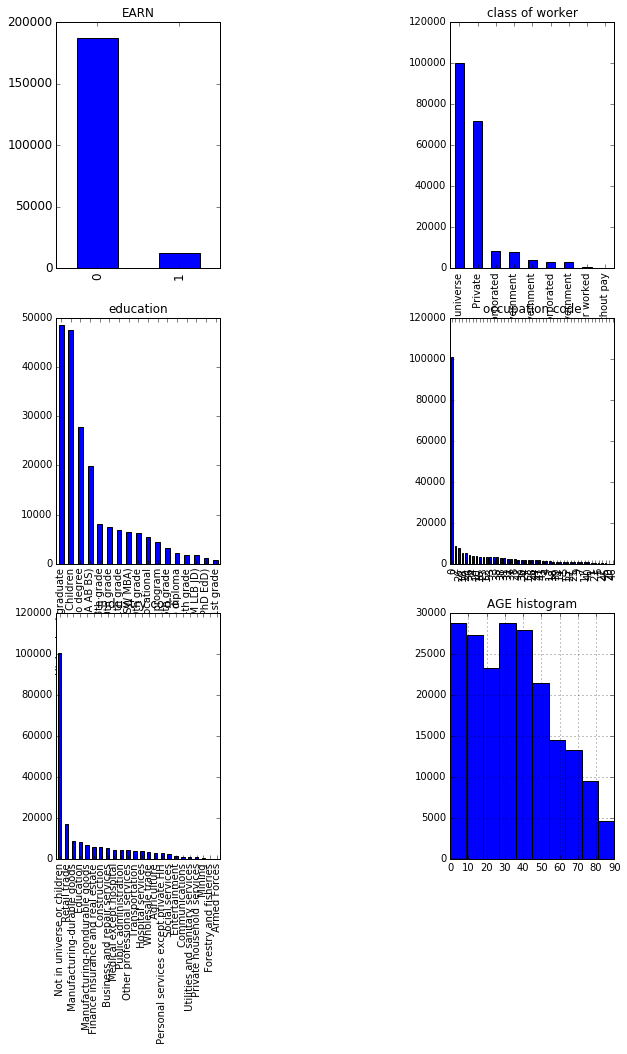

In [1098]:
aFig1 = plt.figure(figsize=(10, 15))
gs = gridspec.GridSpec(3,3)

ax1 = aFig1.add_subplot(gs[0])
ax1 = data['EARN'].value_counts().plot(kind='bar', title ="EARN", fontsize=12)
 
ax2 = aFig1.add_subplot(gs[0,2])
ax2 = data['ACLSWKR'].value_counts().plot(kind = 'bar', title = 'class of worker')


ax3 = aFig1.add_subplot(gs[1,0])
ax3 = data['AHGA'].value_counts().plot(kind = 'bar', title = 'education')


ax4 = aFig1.add_subplot(gs[1,2])
ax4 = data['ADTOCC'].value_counts().plot(kind = 'bar', title = 'occupation code')

ax5 = aFig1.add_subplot(gs[2,0])
ax5 = data['AMJIND'].value_counts().plot(kind = 'bar', title = 'industry code')


ax6 = aFig1.add_subplot(gs[2,2])
ax6 = data['AAGE'].hist()
ax6.set_title('AGE histogram')

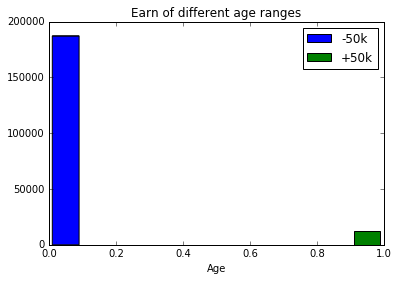

In [1099]:
#Ages vs earn value
age0 = y[y == 0]
age1 = y[y == 1]

plt.hist([age0, age1], stacked=True)
plt.xlabel('Age')
plt.legend(('-50k', '+50k'))
plt.title('Earn of different age ranges')

In [1100]:
def plot_stacked(df, var_1, var_2):
    df = df.groupby([var_1, var_2])[var_1].count().unstack(var_2).fillna(0)
    return df.plot(kind='bar', stacked=True)
    

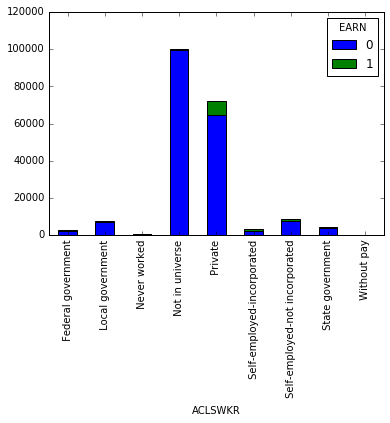

In [1101]:
#Class of workers vs EARN
df = plot_stacked(data, 'ACLSWKR', 'EARN')

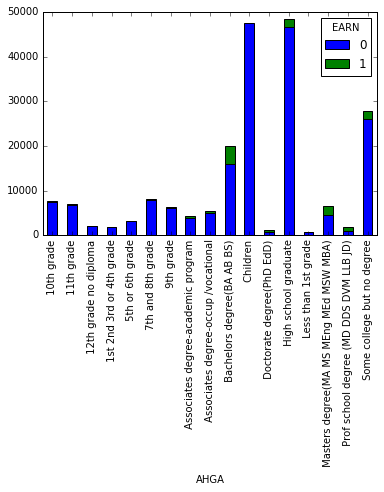

In [1102]:
#Education vs EARN
df = plot_stacked(data, 'AHGA', 'EARN')

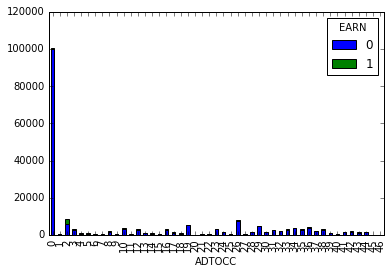

In [1103]:
#Ocupation vs EARN
df = plot_stacked(data, 'ADTOCC', 'EARN')

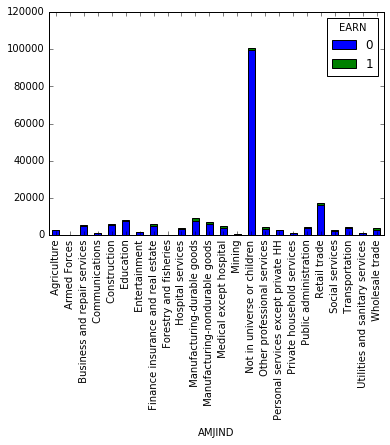

In [1104]:
#Industry vs EARN
df = plot_stacked(data, 'AMJIND', 'EARN')

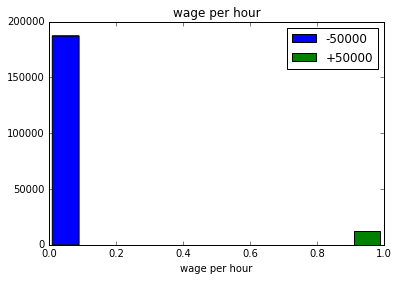

In [1105]:
#Wage vs EARN
wage0 = y[y == 0]
wage1 = y[y == 1]

plt.hist([wage0, wage1], stacked=True)
plt.xlabel('wage per hour')
plt.legend(('-50000', '+50000'))
plt.title('wage per hour')
plt.show()

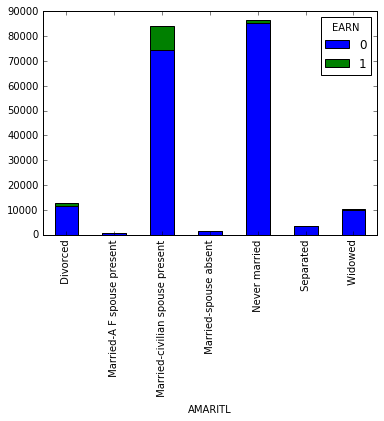

In [1106]:
# Marital status vs Earn
df = plot_stacked(data, 'AMARITL', 'EARN')

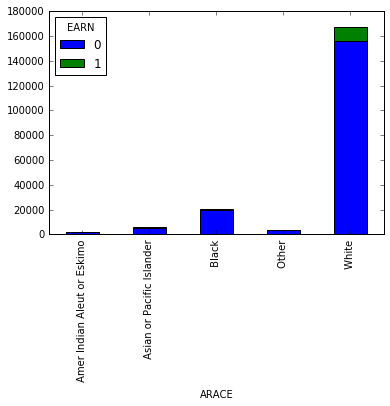

In [1107]:
#Race status vs EARN
df = plot_stacked(data, 'ARACE', 'EARN')

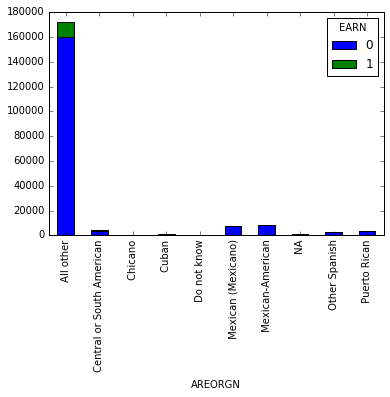

In [1108]:
#Hispanic Origin status vs EARN
df = plot_stacked(data, 'AREORGN', 'EARN')


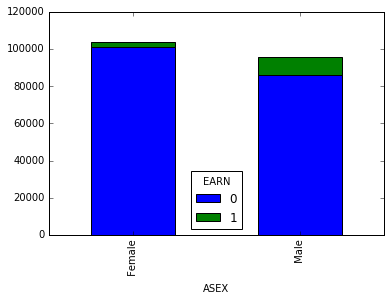

In [1109]:
#Sex vs EARN
df = plot_stacked(data, 'ASEX', 'EARN')

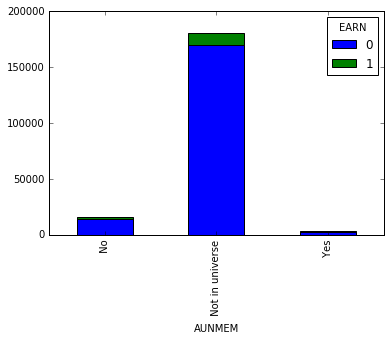

In [1110]:
#Member of a labor union
df = plot_stacked(data, 'AUNMEM', 'EARN')

## Dimensionality reduction using PCA

In [1111]:
#  PCA from sklearn.decompostion to find principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))

In [1112]:
print(X_pca.head(5))

            0           1           2          3          4          5  \
0 -446.996535 -168.033974  -40.410814 -65.499645 -13.480987  16.091688   
1 -447.339294 -167.875249 -686.890213 -61.334431 -12.915601 -32.590340   
2 -447.408385 -167.895833 -748.541622 -62.675275 -13.051478  30.886806   
3 -446.981117 -168.121156   17.640685 -66.051038 -13.753089  34.102484   
4 -447.367253 -167.926433 -671.332162 -63.049598 -13.146967  33.256182   

           6          7         8         9  
0 -45.481379  -0.623369  1.090502  0.010336  
1 -15.904128  28.453559 -7.529240 -2.352304  
2   7.478701  -0.580527 -0.699632  0.133644  
3  15.952741  -0.594464 -1.086805 -0.485725  
4  15.203586  -0.594348 -1.012621 -0.449861  


# Feature selection and model building
## Model building using processed data

In [1143]:
# The total number of features have grown substantially after dummying and adding interaction terms
print(data.shape)
print(X.shape)


(199523, 42)
(199523, 197)


In [1144]:
# Such a large set of features can cause overfitting and also slow computing
# we Use feature selection to select the most important features
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X, y)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X[colnames_selected]


In [1145]:
len(X_train_selected.columns)

20

In [1146]:
# Function to build model and find model performance
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_selected, y)    

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1153]:
# The highest feature's contribution of predictors in logistic regression models 
model.get_params(deep = True)
index_hight_coef = np.argmax(model.coef_)
colnames_selected[index_hight_coef] 

'AHGA_ Prof school degree (MD DDS DVM LLB JD)'

# Apply the model to the Test Data

In [1154]:
data_test = pd.read_csv('census_income_test.csv', header=None)

In [1155]:
data_test.columns = ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC','AHGA','AHRSPAY','AHSCOL', 'AMARITL', 'AMJIND', 
                'AMJOCC', 'ARACE','AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN',
                'CAPLOSS', 'DIVVAL', 'FEDTAX', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL',
                'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 
                'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA', 'VETYN','WKSWORK', 'YEAR', 'EARN']



In [1156]:
data_test.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,VETQVA,VETYN,WKSWORK,YEAR,EARN
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


In [1157]:
# Assign outcome as 0 if income <=50K and as 1 if income >50K
data_test['EARN'] = [0 if x == ' - 50000.' else 1 for x in data_test['EARN']]

# Assign X as a DataFrame of features and y as a Series of the outcome variable
X_test = data_test.drop('EARN', 1)
y_test = data_test.EARN


In [1158]:
X_test['GRINREG'] = [' Not in universe' if x == ' Not in universe' else 'Other' for x in X_test['GRINREG'] ]
X_test['GRINST'] = ['Householder' if x == ' Householder' else 'Other' for x in X_test['GRINST'] ]
X_test['PARENT'] = [' United-States' if x == ' United-States' else 'Other' for x in X_test['PARENT'] ]
X_test['PEFNTVTY'] = [' United-States' if x == ' United-States' else 'Other' for x in X_test['PEFNTVTY'] ]
X_test['PEMNTVTY'] = [' United-States' if x == ' United-States' else 'Other' for x in X_test['PEMNTVTY'] ]
#Create a list of Non numeric features
todummy_list = ['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE','AREORGN', 'ASEX', 'AUNMEM','AUNTYPE',
               'AWKSTAT','FEDTAX', 'FILESTAT','GRINREG','GRINST','HHDFMX', 'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'VETQVA']

X_test = label_encoding(X_test, todummy_list) 
X_test.head()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,HHDREL,MIGSUN,PRCITSHP,...,PEMNTVTY_ United-States,PEMNTVTY_Other,PENATVTY_ Foreign born- Not a citizen of U S,PENATVTY_ Foreign born- U S citizen by naturalization,PENATVTY_ Native- Born abroad of American Parent(s),PENATVTY_ Native- Born in Puerto Rico or U S Outlying,PENATVTY_ Native- Born in the United States,VETQVA_ No,VETQVA_ Not in universe,VETQVA_ Yes
0,38,6,36,0,0,0,0,1032.38,4,0,...,0,1,1,0,0,0,0,0,1,0
1,44,37,12,0,0,0,2500,1462.33,1,0,...,1,0,0,0,0,0,1,0,1,0
2,2,0,0,0,0,0,0,1601.75,0,0,...,1,0,0,0,0,0,1,0,1,0
3,35,29,3,0,0,0,0,1866.88,5,2,...,1,0,0,0,0,0,1,0,1,0
4,49,4,34,0,0,0,0,1394.54,4,0,...,1,0,0,0,0,0,1,0,1,0


In [1159]:
X_test_selected = X_test[colnames_selected]

In [1160]:
from sklearn.metrics import roc_auc_score
y_hat = [x[1] for x in model.predict_proba(X_test_selected)]
auc = roc_auc_score(y_test, y_hat)
    

In [1161]:
#Model Performance
print(auc)

0.921087302016
